In [1]:
#!pip install yfinance
#!pip install vectorbt
#!pip install ta
#!pip install mplfinance
#!pip install plotly
#!pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
import mplfinance as mpf
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf
import plotly.express as px

In [3]:
tickers = ['PETR4.SA']
ativo = yf.download(tickers, start='2021-01-01', end='2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
ativo

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,28.650000,29.180000,28.530001,28.910000,15.694895,74719700
2021-01-05,28.900000,30.180000,28.240000,30.040001,16.308361,95181100
2021-01-06,30.160000,30.900000,30.049999,30.100000,16.340933,96562500
2021-01-07,30.340000,31.150000,30.340000,31.000000,16.829533,56171300
2021-01-08,31.459999,31.760000,30.350000,31.120001,16.894678,67136300
...,...,...,...,...,...,...
2021-12-23,28.330000,28.420000,28.150000,28.330000,18.922455,28713600
2021-12-27,28.320000,28.780001,28.150000,28.750000,19.202986,44227900
2021-12-28,29.010000,29.280001,28.700001,28.780001,19.223024,30688100


In [5]:
#Gráfico d epreços do ativo

px.line(x=ativo.index, y=ativo['Close'], template='simple_white', width=600, height=400).\
    update_layout(paper_bgcolor='#f7f8fa', margin=dict(l=20,r=20,t=50, b=20),
    title='Ativo em 2021', xaxis_title='<b>Data', yaxis_title='<b>Fechamento (R$)')

In [6]:
ativo['Close'].describe()

count    247.000000
mean      26.861943
std        2.240405
min       21.100000
25%       25.420000
50%       27.230000
75%       28.665000
max       31.120001
Name: Close, dtype: float64

In [7]:
corr, p = stats.pearsonr(ativo['Close'], ativo['Close'])
print('Correlação de pearson, r=%.3f'%corr, 'p=%.3f' %p)

Correlação de pearson, r=1.000 p=0.000


In [8]:
#funcao autocorrelação lag=1

ativo['Close'].autocorr(lag=1)

0.9461550387771452

In [9]:
#funcao autocorrelação lag=2

ativo['Close'].autocorr(lag=2)

0.8991384627917363

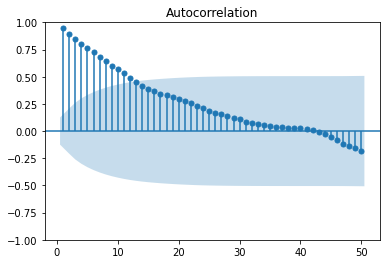

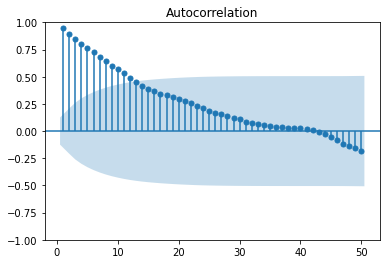

In [10]:
#plot função de autocorrelação

plot_acf(ativo['Close'], lags=50, alpha=0.05, zero=False)

In [11]:
#Dataframe Autocorrelação em uma janela de 5 dias

ticker_olhc = pd.DataFrame()
ticker_olhc['autocorr'] = ativo['Close'].rolling(5).apply(lambda x: x.autocorr(), raw=False)

In [12]:
#Selecionar as primeiras 80 amostras

ticker_olhc['autocorr'].sort_values(ascending=False)[0:80:] 

Date
2021-07-19    0.971617
2021-08-20    0.965369
2021-02-17    0.963864
2021-03-02    0.958202
2021-10-19    0.957095
                ...   
2021-09-21    0.564907
2021-07-23    0.560817
2021-08-03    0.550320
2021-02-23    0.546796
2021-01-27    0.545517
Name: autocorr, Length: 80, dtype: float64

In [13]:
'2021-07-19'
'2021-08-20'
'2021-02-17'

'2021-02-17'

In [14]:
#Gráfico para ver o comportamento
#Construindo outro df com um limitador no indice
dados_teste = ativo['Close'][ativo['Close'].index<='2021-07-19']
dados_teste2 = pd.DataFrame(dados_teste.iloc[-5:])
dados_teste2.vbt.plot().update_xaxes(title_text="<b> Data",
                          rangebreaks=[dict(bounds=["sat", "mon"])]).show()

In [15]:
#Gráfico para ver o comportamento
#Construindo outro df com um limitador no indice
dados_teste = ativo['Close'][ativo['Close'].index<='2021-08-20']
dados_teste2 = pd.DataFrame(dados_teste.iloc[-5:])
dados_teste2.vbt.plot().update_xaxes(title_text="<b> Data",
                          rangebreaks=[dict(bounds=["sat", "mon"])]).show()

In [16]:
#Gráfico para ver o comportamento
#Construindo outro df com um limitador no indice
dados_teste = ativo['Close'][ativo['Close'].index<='2021-02-17']
dados_teste2 = pd.DataFrame(dados_teste.iloc[-5:])
dados_teste2.vbt.plot().update_xaxes(title_text="<b> Data",
                          rangebreaks=[dict(bounds=["sat", "mon"])]).show()

In [19]:
#Transformar para ver no gráfico de candlestick

dados_teste2 = ativo[ativo.index<='2021-02-17']
dados_teste3 = dados_teste2.iloc[-5:]

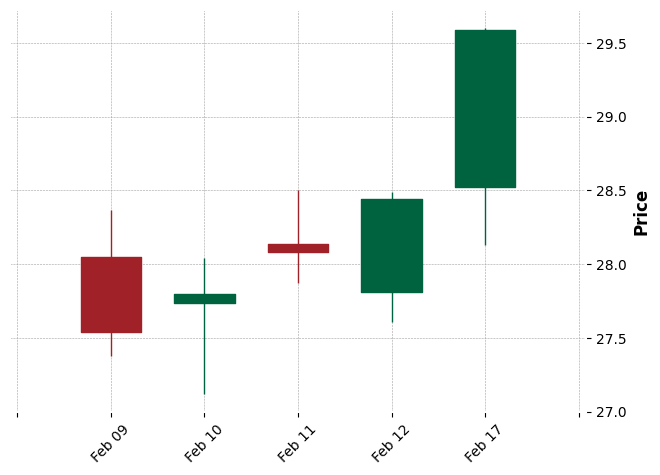

In [20]:
#Gráfico de candlestick

mpf.plot(dados_teste3, type='candle', style='charles')

In [21]:
ticker_olhc['autocorr'].sort_values(ascending=False)[-30:]

Date
2021-05-28   -0.565900
2021-05-26   -0.569549
2021-07-13   -0.577780
2021-04-29   -0.594463
2021-09-16   -0.599620
2021-02-01   -0.602637
2021-09-13   -0.623614
2021-05-25   -0.633932
2021-12-17   -0.639490
2021-07-14   -0.646603
2021-04-30   -0.662118
2021-04-28   -0.664250
2021-04-15   -0.675565
2021-05-27   -0.684132
2021-05-03   -0.724464
2021-11-30   -0.727741
2021-10-28   -0.762932
2021-03-18   -0.770383
2021-04-23   -0.782266
2021-04-07   -0.785749
2021-02-25   -0.851481
2021-08-05   -0.853727
2021-06-14   -0.871656
2021-04-06   -0.892034
2021-03-19   -0.903006
2021-03-22   -0.969239
2021-01-04         NaN
2021-01-05         NaN
2021-01-06         NaN
2021-01-07         NaN
Name: autocorr, dtype: float64

In [22]:
#Gráfico para ver o comportamento
dados_teste = ativo['Close'][ativo['Close'].index<='2021-03-22']
dados_teste2 = pd.DataFrame(dados_teste.iloc[-5:])
dados_teste2.vbt.plot().update_xaxes(title_text="<b> Data",
                          rangebreaks=[dict(bounds=["sat", "mon"])]).show()